### Larger Image size test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab_Files/Crop_disease/Data.zip" -d "/content"

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from numpy import savez_compressed, load

%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback

Found 12376 images belonging to 15 classes.
Found 4138 images belonging to 15 classes.
Epoch 1/15
387/387 [==============================] - 145s 365ms/step - loss: 0.8004 - accuracy: 0.7483 - val_loss: 3.9378 - val_accuracy: 0.3731
Epoch 2/15
387/387 [==============================] - 138s 357ms/step - loss: 0.3838 - accuracy: 0.8767 - val_loss: 2.1379 - val_accuracy: 0.5176
Epoch 3/15
387/387 [==============================] - 139s 358ms/step - loss: 0.2395 - accuracy: 0.9261 - val_loss: 0.8046 - val_accuracy: 0.7395
Epoch 4/15
387/387 [==============================] - 139s 358ms/step - loss: 0.1767 - accuracy: 0.9437 - val_loss: 1.4622 - val_accuracy: 0.6160
Epoch 5/15
387/387 [==============================] - 139s 358ms/step - loss: 0.1257 - accuracy: 0.9615 - val_loss: 1.5573 - val_accuracy: 0.6593
Epoch 6/15
387/387 [==============================] - 138s 358ms/step - loss: 0.0858 - accuracy: 0.9756 - val_loss: 0.4854 - val_accuracy: 0.8639
Epoch 7/15
387/387 [=================

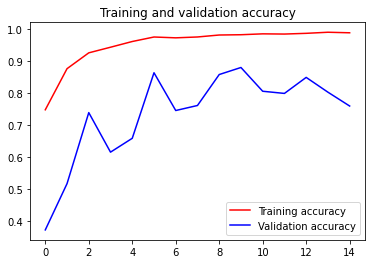

<Figure size 432x288 with 0 Axes>

In [ ]:
## Simple CNN v4
model_2d = tf.keras.Sequential([
    # Conv2D(128,(3,3), activation = 'relu'),
    # MaxPool2D(2,2),
    # BatchNormalization(),
    # Dropout(0.2),
    Conv2D(128,(3,3), activation='relu', input_shape = (256,256,3)),
    MaxPool2D(2,2),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(15, activation='softmax')
])
opt_2d = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     tf.keras.applications.vgg16.preprocess_input
# )

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=32
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=32
)


history_2d = model_2d.fit(train_set, validation_data=val_set, epochs=15)

####
acc = history_2d.history['accuracy']
val_acc = history_2d.history['val_accuracy']
loss = history_2d.history['loss']
val_loss = history_2d.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### VGG16 with image augmentation | Summary: Train: 99.9%; Val: 94.3%

In [ ]:
VGG = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)
# VGG.summary()
for layer in VGG.layers:
    layer.trainable = False

model_vgg = Sequential()
model_vgg.add(VGG)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dropout(0.2))
model_vgg.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_vgg.add(BatchNormalization())
# model_vgg.add(tf.keras.layers.Dropout(0.4))
model_vgg.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_vgg.summary()
# optimizer1 = tf.keras.optimizers.SGD(lr=0.05, decay=0.1, momentum=0.1, nesterov=False)

# model_vgg.compile(optimizer= optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])
# history_vgg = model_vgg.fit(X_train,Y_train, validation_data=(X_val, Y_val), batch_size = 50, epochs=20)

model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=40,
# 		zoom_range=0.2,
# 		width_shift_range=0.2,
# 		height_shift_range=0.2,
# 		shear_range=0.2,
# 		horizontal_flip=True,
# 		fill_mode="nearest"
# )

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)


history_vgg = model_vgg.fit(train_set, validation_data=val_set, epochs=5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dense_21 (Dense)            (None, 128)               4194432   
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                      

### **With preprocessing inputs** | Summary: Train: 99.9%; Val: 96.33%



---



In [ ]:
VGG = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)
# VGG.summary()
for layer in VGG.layers:
    layer.trainable = False

model_vgg = Sequential()
model_vgg.add(VGG)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_vgg.summary()
# optimizer1 = tf.keras.optimizers.SGD(lr=0.05, decay=0.1, momentum=0.1, nesterov=False)

# model_vgg.compile(optimizer= optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])
# history_vgg = model_vgg.fit(X_train,Y_train, validation_data=(X_val, Y_val), batch_size = 50, epochs=20)

model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    tf.keras.applications.vgg16.preprocess_input
)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    tf.keras.applications.vgg16.preprocess_input
)
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)


history_vgg = model_vgg.fit(train_set, validation_data=val_set, epochs=10)

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               25

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
194/194 [==============================] - 193s 863ms/step - loss: 0.4855 - accuracy: 0.8659 - val_loss: 0.2629 - val_accuracy: 0.9193
Epoch 2/10
194/194 [==============================] - 142s 733ms/step - loss: 0.0550 - accuracy: 0.9914 - val_loss: 0.1572 - val_accuracy: 0.9531
Epoch 3/10
194/194 [==============================] - 142s 734ms/step - loss: 0.0129 - accuracy: 0.9993 - val_loss: 0.1389 - val_accuracy: 0.9599
Epoch 4/10
194/194 [==============================] - 142s 734ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9601
Epoch 5/10
194/194 [==============================] - 142s 733ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1315 - val_accuracy: 0.9621
Epoch 6/10
194/194 [==============================] - 142s 733ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 0.9618
Epoch 7/10
194/194 [==============================] - 142s 733ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1313 -

### Data Augmentation | Summary: Train: 96.3%; Val: 95%

In [ ]:
VGG = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)
# VGG.summary()
for layer in VGG.layers:
    layer.trainable = False

model_vgg = Sequential()
model_vgg.add(VGG)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_vgg.summary()
# optimizer1 = tf.keras.optimizers.SGD(lr=0.05, decay=0.1, momentum=0.1, nesterov=False)

# model_vgg.compile(optimizer= optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])
# history_vgg = model_vgg.fit(X_train,Y_train, validation_data=(X_val, Y_val), batch_size = 50, epochs=20)

model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
		zoom_range=0.1,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.2,
		horizontal_flip=True,
		fill_mode="nearest"
)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)


history_vgg = model_vgg.fit(train_set, validation_data=val_set, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                      

In [ ]:
VGG = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)
# VGG.summary()
for layer in VGG.layers:
    layer.trainable = False

model_vgg = Sequential()
model_vgg.add(VGG)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dropout(0.4))
model_vgg.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(tf.keras.layers.Dropout(0.1))
model_vgg.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_vgg.summary()
# optimizer1 = tf.keras.optimizers.SGD(lr=0.05, decay=0.1, momentum=0.1, nesterov=False)

# model_vgg.compile(optimizer= optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])
# history_vgg = model_vgg.fit(X_train,Y_train, validation_data=(X_val, Y_val), batch_size = 50, epochs=20)

model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
		zoom_range=0.1,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.2,
		horizontal_flip=True,
		fill_mode="nearest"
)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)


history_vgg = model_vgg.fit(train_set, validation_data=val_set, epochs=15)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_17 (Flatten)        (None, 32768)             0         
                                                                 
 dense_48 (Dense)            (None, 128)               4194432   
                                                                 
 batch_normalization_22 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                     

### MobilenetV2 with image augmentation | Summary: Train: 94%; Val: 84%

In [ ]:
mbnet_v2 = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(256,256,3)
)

mbnet_v2.trainable = False
model_mbnet = Sequential()
model_mbnet.add(mbnet_v2)
model_mbnet.add(tf.keras.layers.Flatten())
model_mbnet.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_mbnet.add(BatchNormalization())
# model_mbnet.add(tf.keras.layers.Dropout(0.4))
model_mbnet.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_mbnet.add(BatchNormalization())
# model_mbnet.add(tf.keras.layers.Dropout(0.1))
model_mbnet.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_mbnet.summary()
model_mbnet.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
# early_stopping_cb = Callback.EarlyStopping(monitor="loss", patience=3)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     tf.keras.applications.mobilenet_v2.preprocess_input
# )
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(tf.keras.applications.MobileNetV2.preprocess_input)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(tf.keras.applications.MobileNetV2.preprocess_input)
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)

history_mbnet = model_mbnet.fit(train_set, validation_data=val_set, epochs=5)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_12 (Flatten)        (None, 81920)             0         
                                                                 
 dense_33 (Dense)            (None, 128)               10485888  
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 64)              

**With preprocessing step**

In [ ]:
mbnet_v2 = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(256,256,3)
)

mbnet_v2.trainable = False
model_mbnet = Sequential()
model_mbnet.add(mbnet_v2)
model_mbnet.add(tf.keras.layers.Flatten())
model_mbnet.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_mbnet.add(BatchNormalization())
model_mbnet.add(tf.keras.layers.Dropout(0.4))
model_mbnet.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_mbnet.add(BatchNormalization())
model_mbnet.add(tf.keras.layers.Dropout(0.1))
model_mbnet.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_mbnet.summary()
model_mbnet.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
# early_stopping_cb = Callback.EarlyStopping(monitor="loss", patience=3)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
		zoom_range=0.1,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.2,
		horizontal_flip=True,
		fill_mode="nearest"
)
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(
    directory = '/content/train/', class_mode= 'categorical', batch_size=64
)
val_set = val_datagen.flow_from_directory(
    directory='/content/val/', class_mode= 'categorical', batch_size=64
)

history_mbnet = model_mbnet.fit(train_set, validation_data=val_set, epochs=15)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_14 (Flatten)        (None, 81920)             0         
                                                                 
 dense_39 (Dense)            (None, 128)               10485888  
                                                                 
 batch_normalization_20 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
194/194 [==============================] - 58s 282ms/step - loss: 1.1600 - accuracy: 0.6479 - val_loss: 0.6740 - val_accuracy: 0.7885
Epoch 2/5
194/194 [==============================] - 53s 275ms/step - loss: 0.5608 - accuracy: 0.8250 - val_loss: 0.6476 - val_accuracy: 0.7941
Epoch 3/5
194/194 [==============================] - 53s 274ms/step - loss: 0.3630 - accuracy: 0.8874 - val_loss: 0.6068 - val_accuracy: 0.8006
Epoch 4/5
194/194 [==============================] - 53s 275ms/step - loss: 0.2606 - accuracy: 0.9167 - val_loss: 0.5255 - val_accuracy: 0.8330
Epoch 5/5
194/194 [==============================] - 53s 274ms/step - loss: 0.1706 - accuracy: 0.9476 - val_loss: 0.5519 - val_accuracy: 0.8415


### EfficientNet | Summary: Train: 91.6%; Val: 92.3%

In [ ]:
# import tensorflow_hub as hub
old_model_2 = tf.keras.applications.efficientnet.EfficientNetB7(
    weights="imagenet",
    include_top=False,
    input_shape=(256,256,3)
)
# efficientnet = 'efficientnet/'
# old_model_2.trainable = False
for layer in old_model_2.layers:
    layer.trainable = False

model_3b = Sequential()
model_3b.add(old_model_2)
model_3b.add(tf.keras.layers.Flatten())
model_3b.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_3b.add(BatchNormalization())
model_3b.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_3b.add(BatchNormalization())
model_3b.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_3b.summary()
# optimizer = tf.keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1, nesterov=False)
model_3b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
		zoom_range=0.1,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.2,
		horizontal_flip=True,
		fill_mode="nearest"
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_set = train_datagen.flow_from_directory(directory = '/content/train/', class_mode= 'categorical', batch_size=32)
val_set = val_datagen.flow_from_directory(directory='/content/val/', class_mode= 'categorical', batch_size=32)

history_3b = model_3b.fit(train_set, validation_data=val_set,batch_size = 50, epochs=5)

258088960/258076736 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 8, 8, 2560)       64097687  
                                                                 
 flatten_2 (Flatten)         (None, 163840)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               20971648  
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Batc  (None, 64)             

In [ ]:
# import tensorflow_hub as hub
old_model_2 = tf.keras.applications.efficientnet.EfficientNetB7(
    weights="imagenet",
    include_top=False,
    input_shape=(256,256,3)
)
# efficientnet = 'efficientnet/'
# old_model_2.trainable = False
for layer in old_model_2.layers:
    layer.trainable = False

model_3b = Sequential()
model_3b.add(old_model_2)
model_3b.add(tf.keras.layers.Flatten())
model_3b.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_3b.add(BatchNormalization())
model_3b.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_3b.add(BatchNormalization())
model_3b.add(tf.keras.layers.Dense(15, activation = 'softmax'))

model_3b.summary()
# optimizer = tf.keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1, nesterov=False)
model_3b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(tf.keras.applications.efficientnet.EfficientNetB7.preprocess_input)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(tf.keras.applications.efficientnet.EfficientNetB7.preprocess_input)
train_set = train_datagen.flow_from_directory(directory = '/content/train/', class_mode= 'categorical', batch_size=32)
val_set = val_datagen.flow_from_directory(directory='/content/val/', class_mode= 'categorical', batch_size=32)

history_3b = model_3b.fit(train_set, validation_data=val_set,batch_size = 50, epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 8, 8, 2560)       64097687  
                                                                 
 flatten_3 (Flatten)         (None, 163840)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               20971648  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 15)                975       
                                                                 
Total params: 85,078,566
Trainable params: 20,980,879
Non-trainable params: 64,097,687
_________________________________________________________________
Found 12376 images belonging to 1